In [1]:
# https://www.kaggle.com/a03102030/plant-pathology-2020-resnet50
#384
# 資料處理套件
import os
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns

In [2]:
# 設定顯示中文字體
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [3]:
#指定GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [4]:
# Keras深度學習模組套件
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [5]:
# tensorflow深度學習模組套件
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

#遷移式學習import
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications.vgg19 import VGG19
#B7
import efficientnet.tfkeras as efn
import tensorflow.keras.layers as L


from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
print(pd.__version__)
print(tf.__version__)

1.0.5
2.0.0


In [7]:
# 讀取資料集標籤檔
df_train = pd.read_csv("C:/Users/danie/mango/C1-P2_Train Dev/train2.csv",encoding="utf8")
# 顯示資料集標籤檔
df_train.head()

,image_id,grade
0,31191.jpg,A
1,77679.jpg,A
2,71334.jpg,B
3,17095.jpg,A
4,48491.jpg,A


In [8]:
print(df_train.shape)

(45000, 2)


In [9]:
train_files = df_train.iloc[:,0].values
train_labels = df_train.iloc[:,1].values
print(train_labels[:10])

['A' 'A' 'B' 'A' 'A' 'A' 'B' 'C' 'A' 'A']


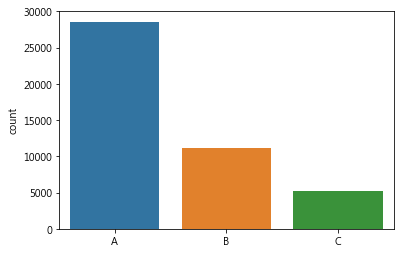

In [10]:
import seaborn as sns
g = sns.countplot(train_labels)

In [11]:
from tensorflow.keras.applications.xception import preprocess_input
img_gen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1./255,
    brightness_range=[0.5, 1.5],
    validation_split=0.25   #設定驗證集
)

In [12]:
train_generator = img_gen.flow_from_dataframe(
                                              dataframe=df_train,
                                              directory="C:/Users/danie/mango/C1-P2_Train Dev/test/Crop_Train",
                                              x_col="image_id",
                                              y_col="grade",
                                              batch_size = 10,
                                              #has_ext=False, 
                                              subset="training", 
                                              class_mode="categorical",
                                              color_mode="rgb",
                                              target_size=(224,224))

val_generator=img_gen.flow_from_dataframe( 
                                          dataframe=df_train, 
                                          directory="C:/Users/danie/mango/C1-P2_Train Dev/test/Crop_Train",
                                          x_col="image_id",
                                          y_col="grade", 
                                          batch_size = 10,
                                          #has_ext=False, 
                                          subset="validation", 
                                          class_mode="categorical", 
                                          color_mode="rgb",
                                          target_size=(224,224))

Found 33750 validated image filenames belonging to 3 classes.
Found 11250 validated image filenames belonging to 3 classes.


In [ ]:
# train_iter=datagen.flow_from_dataframe( dataframe=traindf, 
#                                         directory="./train/", 
#                                         x_col="id", 
#                                         y_col="label", 
#                                         has_ext=False, 
#                                         subset="training", 
#                                         class_mode="categorical", 
#                                         target_size=(32,32)) 
# valid_iter=datagen.flow_from_dataframe( dataframe=traindf, 
#                                         directory="./train/", 
#                                         x_col="id", 
#                                         y_col="label", 
#                                         has_ext=False, 
#                                         subset="validation", 
#                                         class_mode="categorical", 
#                                         target_size=(32,32))



In [13]:
train_generator.class_indices

{'A': 0, 'B': 1, 'C': 2}

In [14]:
val_generator.class_indices

{'A': 0, 'B': 1, 'C': 2}

In [15]:
#step_size_train = train_generator.n//train_generator.batch_size
if train_generator.n % train_generator.batch_size ==0:
  step_size_train=train_generator.n//train_generator.batch_size
else:
  step_size_train=train_generator.n//train_generator.batch_size + 1
print(step_size_train)

3375


In [16]:
#step_size_valid = val_generator.n//val_generator.batch_size
if val_generator.n % val_generator.batch_size ==0:
  step_size_valid = val_generator.n//val_generator.batch_size
else:
  step_size_valid = val_generator.n//val_generator.batch_size + 1
print(step_size_valid)

1125


In [17]:
#EB7 model
model_finetuned = tf.keras.Sequential([efn.EfficientNetB7(input_shape=(224, 224, 3),
                                                weights='imagenet',
                                                #weights='noisy-student',
                                                include_top=False),
                                       L.GlobalAveragePooling2D(),
                                       L.Dense(3,activation='softmax')])
model_finetuned.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['categorical_accuracy'])
model_finetuned.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Model)      (None, 7, 7, 2560)        64097680  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 7683      
Total params: 64,105,363
Trainable params: 63,794,643
Non-trainable params: 310,720
_________________________________________________________________


In [18]:
# 回調函數
bestckpt_filepath = 'C:/Users/danie/mango/C1-P2_Train Dev/modelsave_ckpt/efnetB7forMango.best.hdf5'
allckpt_filepath="C:/Users/danie/mango/C1-P2_Train Dev/modelsave_ckpt/New_Mangotest_crop_and_B7_4imageGenerator/weights-improvement-{epoch:02d}-{categorical_accuracy:.2f}.hdf5"
RLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.3,patience=2, min_lr=0.000001)
ckptforall = ModelCheckpoint(allckpt_filepath, monitor='categorical_accuracy', verbose=1, save_best_only=True, mode='max')
#ckptforbest = ModelCheckpoint(bestckpt_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [19]:
history = model_finetuned.fit_generator(
    generator = train_generator,                                  
    steps_per_epoch = step_size_train,
    epochs = 10,
    validation_data = val_generator, 
    validation_steps = step_size_valid, 
    verbose = 1,
    callbacks = [RLR, ckptforall],
    use_multiprocessing = False,
    shuffle = True
    )

Epoch 1/10
3374/3375 [============================>.] - ETA: 1s - loss: 0.7279 - categorical_accuracy: 0.6892
Epoch 00001: categorical_accuracy improved from -inf to 0.68927, saving model to C:/Users/danie/mango/C1-P2_Train Dev/modelsave_ckpt/New_Mangotest_crop_and_B7_4imageGenerator/weights-improvement-01-0.69.hdf5
3375/3375 [==============================] - 6623s 2s/step - loss: 0.7279 - categorical_accuracy: 0.6893 - val_loss: 0.9992 - val_categorical_accuracy: 0.6043
Epoch 2/10
3374/3375 [============================>.] - ETA: 1s - loss: 0.6457 - categorical_accuracy: 0.7297
Epoch 00002: categorical_accuracy improved from 0.68927 to 0.72969, saving model to C:/Users/danie/mango/C1-P2_Train Dev/modelsave_ckpt/New_Mangotest_crop_and_B7_4imageGenerator/weights-improvement-02-0.73.hdf5
3375/3375 [==============================] - 6651s 2s/step - loss: 0.6456 - categorical_accuracy: 0.7297 - val_loss: 0.7124 - val_categorical_accuracy: 0.7206
Epoch 3/10
3374/3375 [=====================

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

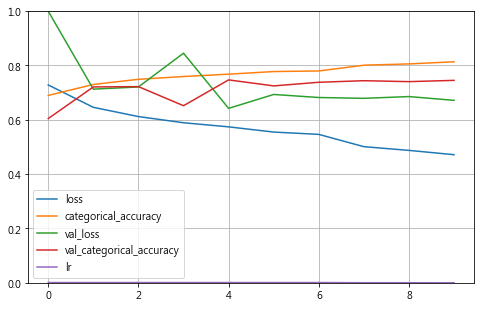

In [21]:
plot_learning_curves(history)

In [22]:
history = model_finetuned.fit_generator(
    generator = train_generator,                                  
    steps_per_epoch = step_size_train,
    epochs = 10,
    validation_data = val_generator, 
    validation_steps = step_size_valid, 
    verbose = 1,
    callbacks = [RLR, ckptforall],
    use_multiprocessing = False,
    shuffle = True
    )

Epoch 1/10
3374/3375 [============================>.] - ETA: 1s - loss: 0.4630 - categorical_accuracy: 0.8153
Epoch 00001: categorical_accuracy improved from 0.81319 to 0.81529, saving model to C:/Users/danie/mango/C1-P2_Train Dev/modelsave_ckpt/New_Mangotest_crop_and_B7_4imageGenerator/weights-improvement-01-0.82.hdf5
3375/3375 [==============================] - 6649s 2s/step - loss: 0.4630 - categorical_accuracy: 0.8153 - val_loss: 0.6823 - val_categorical_accuracy: 0.7442
Epoch 2/10
3374/3375 [============================>.] - ETA: 1s - loss: 0.4620 - categorical_accuracy: 0.8145
Epoch 00002: categorical_accuracy did not improve from 0.81529
3375/3375 [==============================] - 6658s 2s/step - loss: 0.4621 - categorical_accuracy: 0.8144 - val_loss: 0.6914 - val_categorical_accuracy: 0.7363
Epoch 3/10
3374/3375 [============================>.] - ETA: 1s - loss: 0.4560 - categorical_accuracy: 0.8183
Epoch 00003: categorical_accuracy improved from 0.81529 to 0.81828, saving mod

In [23]:
# 讀取測試資料集標籤檔
Sample_label1 = pd.read_csv("C:/Users/danie/mango/C1-P2_Train Dev/dev _train.csv",encoding="utf8")
# 顯示測試資料集標籤檔
Sample_label1.head()

,32783.jpg,A
0,24935.jpg,B
1,30841.jpg,A
2,57713.jpg,A
3,85593.jpg,A
4,32078.jpg,A


In [24]:
# 串接圖片檔的路徑
Sample_pics_path1 = os.path.join("C:/Users/danie/mango/C1-P2_Train Dev/Crop_Dev")
# 讀取路徑中的圖片
train_mango_fnames1 = os.listdir(Sample_pics_path1)

In [25]:
#測試圖片
print(train_mango_fnames1[0])
print(train_mango_fnames1[1])
print(train_mango_fnames1[2])

00001.jpg
00020.jpg
00043.jpg


In [26]:
# 讀取圖檔
img1 = mpimg.imread("C:/Users/danie/mango/C1-P2_Train Dev/Crop_Dev/00001.jpg")
# 查看資料型態
print(type(img1))
# 顯示圖片的比例
print(img1.shape)

<class 'numpy.ndarray'>
(285, 364, 3)


In [27]:
# 把圖片的比例壓縮至800x800 
res1 = cv2.resize(img1,(800,800),interpolation=cv2.INTER_LINEAR)
# 顯示壓縮後圖片的比例
res1.shape

(800, 800, 3)

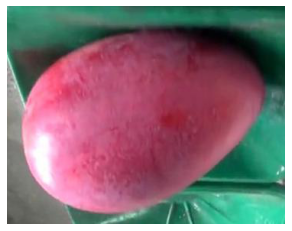

In [28]:
# 顯示原圖的芒果照片
plt.imshow(img1)
plt.axis('off')
plt.show()

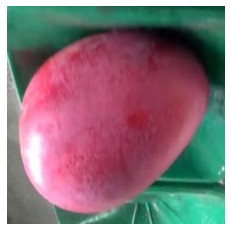

In [29]:
# 顯示壓縮過原圖的芒果照片
plt.imshow(res1)
plt.axis('off')
plt.show()

In [30]:
# 製作標籤&資料集
csvfile1 = open('C:/Users/danie/mango/C1-P2_Train Dev/dev _train.csv')
reader1 = csv.reader(csvfile1)

In [ ]:
img_gen1 = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1./255,
    brightness_range=[0.5, 1.5],
    validation_split=0.25   #設定驗證集
)

In [48]:
x_test = x_test/255

In [49]:
model_finetuned.evaluate(x_test, y_test, verbose=0)

[0.8796226977961404, 0.7262857]

In [50]:
y_pred = model_finetuned.predict(x_test)

In [51]:
# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
score = count/len(y_pred)
print('正确率为:%.2f%s' % (score*100,'%'))

正确率为:72.63%


In [52]:
# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)
print(predict_label)
print(len(predict_label))

[0 0 0 ... 0 0 0]
7000


In [53]:
# 模型原標籤
true_label = y1_label_org[:7000]
true_label = np.array(true_label)
print(true_label)
print(len(true_label))

['0' '1' '0' ... '0' '1' '0']
7000


In [54]:
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

預測值,0,1
實際值,,
0,5004,384
1,936,80
2,589,7
